## packages

In [ ]:
pip install nibabel

In [ ]:
pip install kaggle

In [5]:
from google.colab.patches import cv2_imshow
import pandas as pd
from tensorflow.keras.optimizers import Adam
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

## resizing image

/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/resized/resized_10 no.jpg
/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/resized/resized_11 no.jpg
/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/resized/resized_5 no.jpg
/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/resized/resized_44no.jpg
/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/resized/resized_42 no.jpg
/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/resized/resized_45 no.jpg
/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/resized/resized_50 no.jpg
/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/resized/resized_46 no.jpg
/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/resized/resized_40 no.jpg
/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/resized/resized_4 no.jpg
/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/resized/resized_41 no.jpg
/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/resized/resized_36 no.jpg
/content/drive/MyDrive/Colab Notebooks/Heal

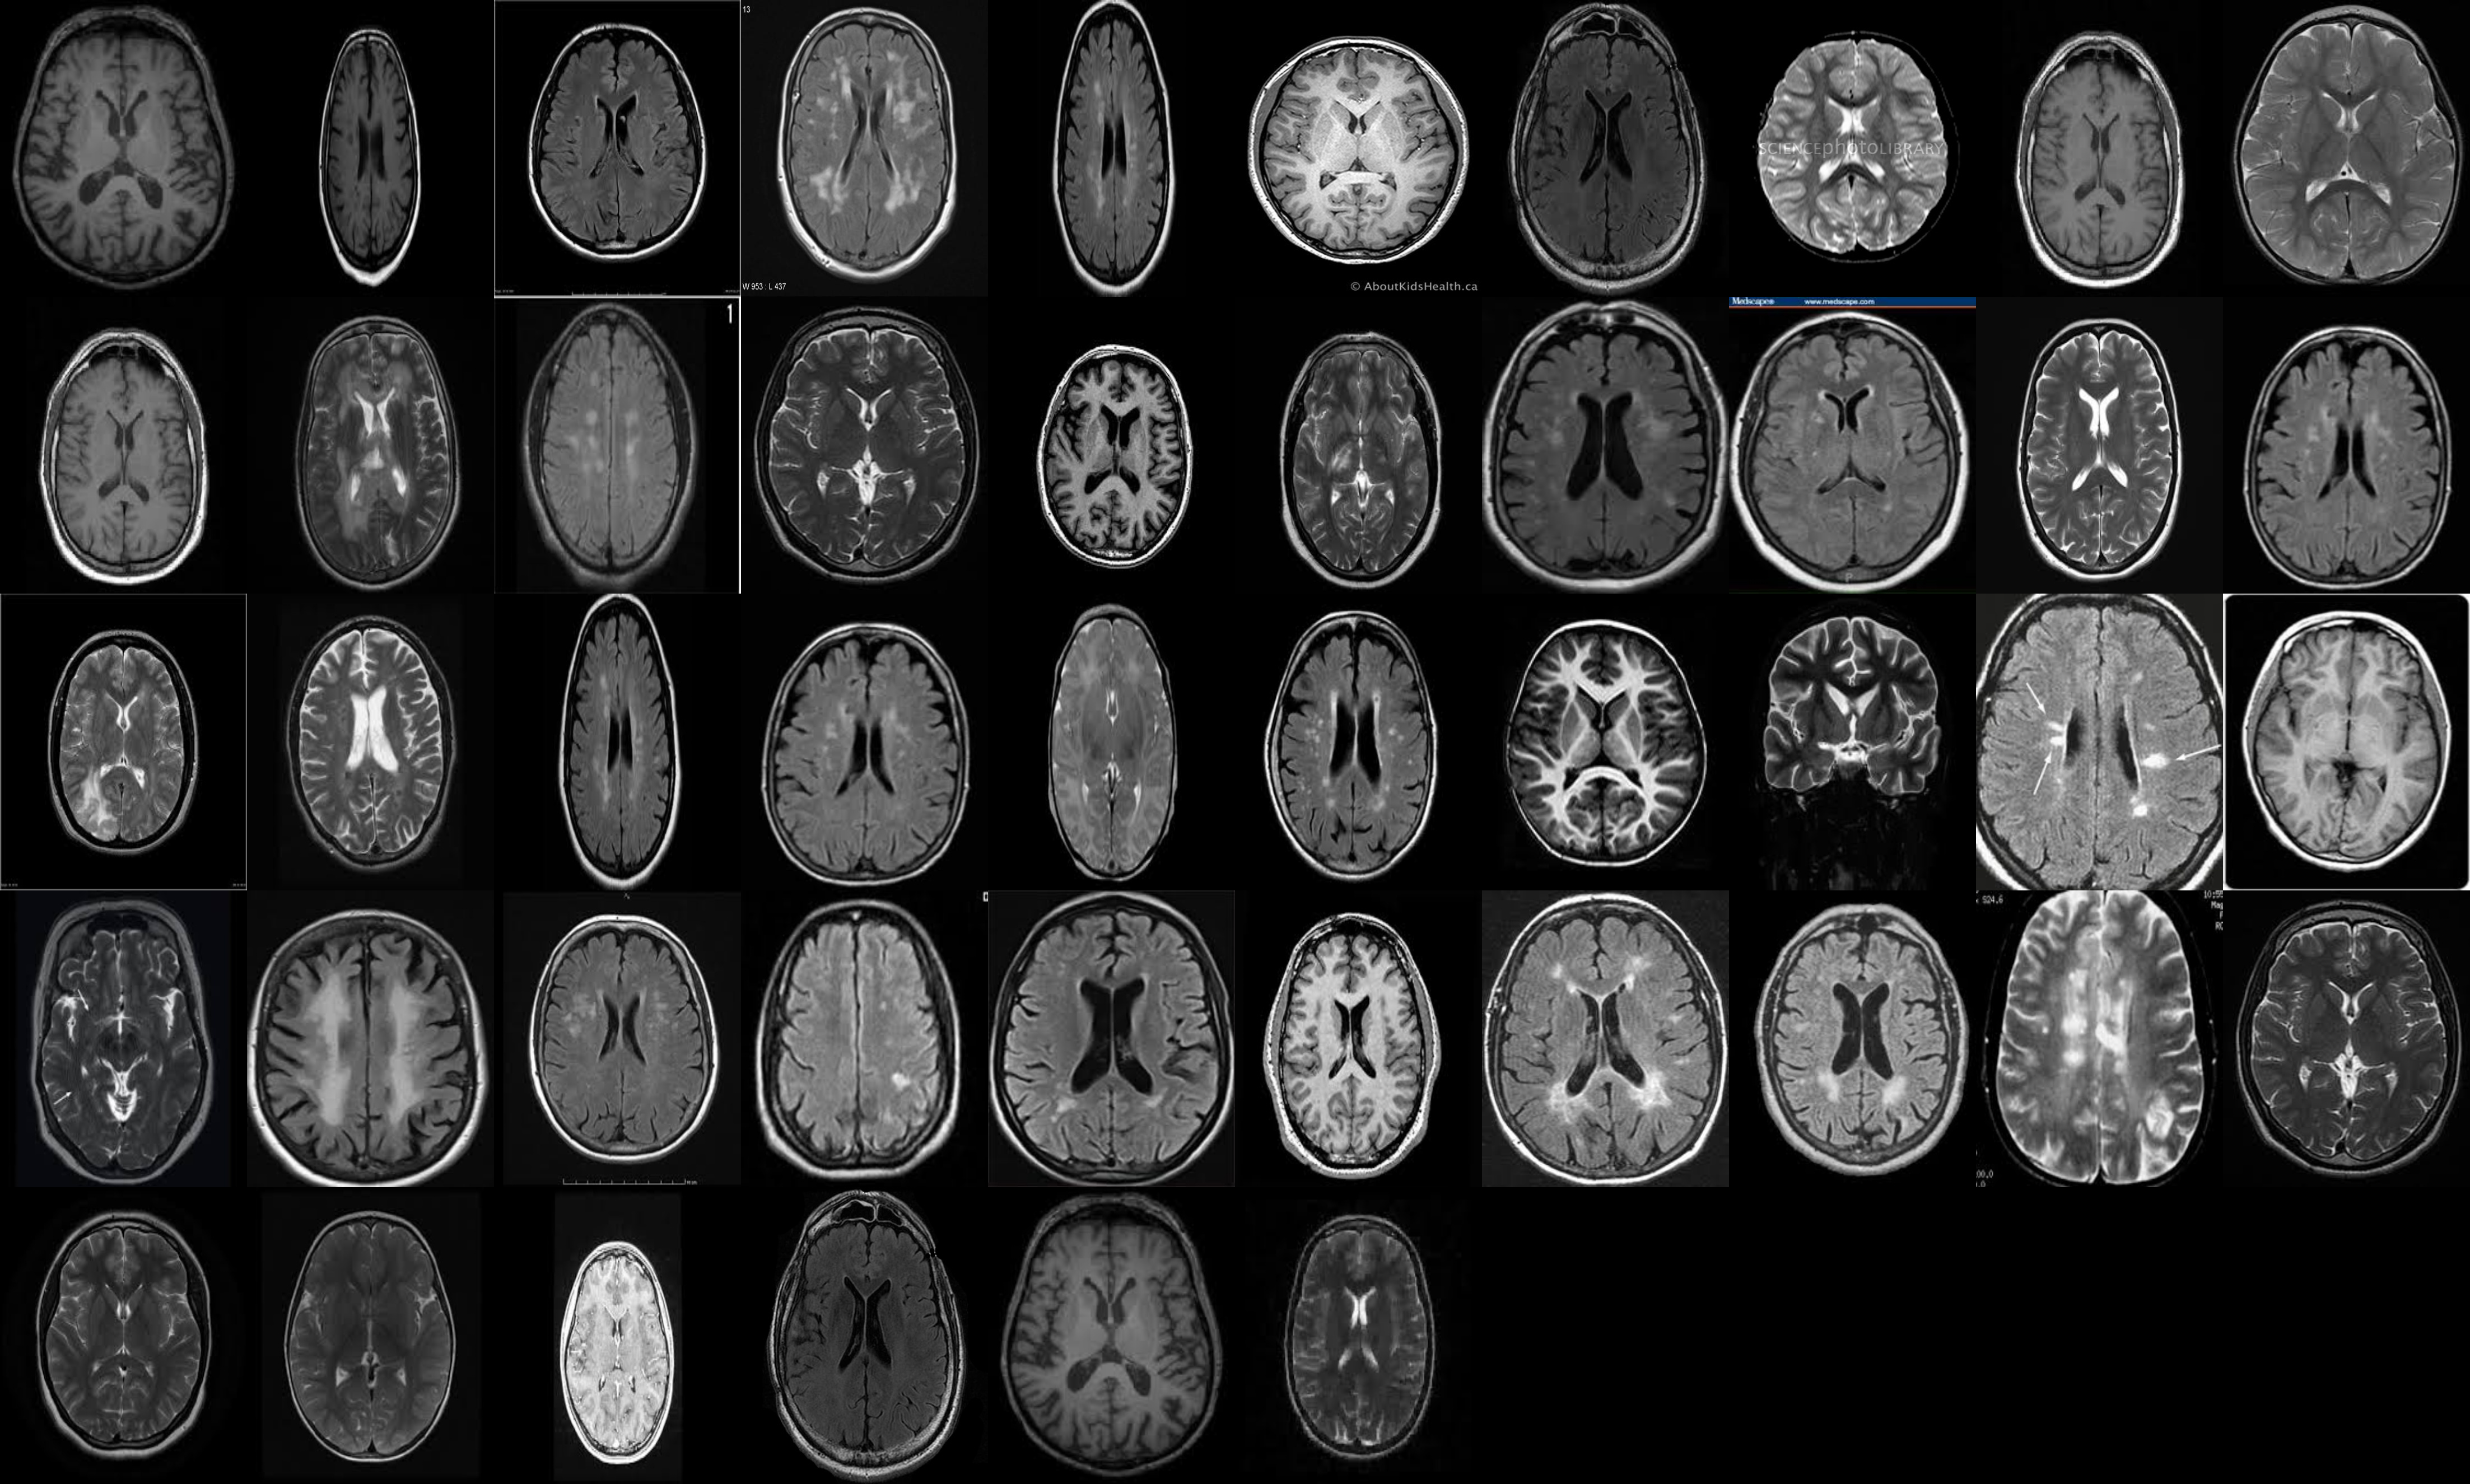

In [ ]:
import os
import cv2
import numpy as np

# Set the path to the folder containing the images
image_folder = '/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/resized'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]

# Initialize variables to determine the matrix size
max_height = 0
max_width = 0
total_width = 0

# Calculate the maximum image dimensions and total width
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    max_height = max(max_height, height)
    max_width = max(max_width, width)
    total_width += width

# Calculate the number of rows and columns needed
num_rows = (len(image_files) + 9) // 10  # Round up
num_cols = 10

# Create an empty matrix to hold the images
images_matrix = np.zeros((num_rows * max_height, num_cols * max_width, 3), dtype=np.uint8)

# Loop through the image files and display them in the matrix
for i, image_file in enumerate(image_files):
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # Calculate the row and column indices for the current image
    row = i // num_cols
    col = i % num_cols

    # Insert the image into the matrix
    images_matrix[row * max_height:(row * max_height + height), col * max_width:(col * max_width + width)] = image

    # Print the image path
    print(image_path)

# Display the matrix of images
cv2_imshow(images_matrix)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2

def print_image_dimensions(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print("Error: Unable to load image from path:", image_path)
        return

    # Get image dimensions
    height, width, channels = image.shape

    # Print image dimensions
    print("Image dimensions (height x width x channels):", height, "x", width, "x", channels)

# Example usage
image_path = '/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/input/11 no.jpg'
print_image_dimensions(image_path)

Image dimensions (height x width x channels): 530 x 441 x 3


In [ ]:
import os
import cv2

# Set the path to the folder containing the images
image_folder = '/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/output'

# Initialize variables to store the maximum width and height
max_width = 0
max_height = 0

# Loop through all files in the folder to find the maximum size
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Construct the full file path
        image_path = os.path.join(image_folder, filename)

        # Load the image
        image = cv2.imread(image_path)

        # Get the image dimensions
        height, width, _ = image.shape

        # Update the maximum width and height if necessary
        max_width = max(max_width, width)
        max_height = max(max_height, height)

# Set the maximum size as the target size
target_size = (max_width, max_height)

# Loop through all files again to resize the images
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Construct the full file path
        image_path = os.path.join(image_folder, filename)

        # Load the image
        image = cv2.imread(image_path)

        # Resize the image to the target size
        resized_image = cv2.resize(image, target_size)

        # Save the resized image with a new filename
        new_filename = f'{filename}'
        new_path = os.path.join(image_folder, new_filename)
        cv2.imwrite(new_path, resized_image)

        print(f'Resized {filename} to {target_size}')

## augmentation

In [ ]:
import albumentations as A
import cv2
import os

# Define the path to your dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/output'

# Define the path to save the augmented images
augmented_dir = '/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/input'

# Create the augmentation pipeline
transform = A.Compose([
    A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03, interpolation=cv2.INTER_LINEAR, border_mode=cv2.BORDER_CONSTANT, value=0, mask_value=None, always_apply=False, approximate=False, p=0.5),
])

# Loop through the dataset and apply elastic deformations
for filename in os.listdir(data_dir):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.bmp'):
        image_path = os.path.join(data_dir, filename)
        image = cv2.imread(image_path)

        # Apply the augmentation pipeline
        augmented = transform(image=image)['image']

        # Save the augmented image
        augmented_path = os.path.join(augmented_dir, filename)
        cv2.imwrite(augmented_path, augmented)

## data preprocessing

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os
import numpy as np

In [9]:
input_data_dir = "/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/input"
output_data_dir = "/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/output"

In [10]:
def load_image(filepath, target_size=(530, 441)):
    img = load_img(filepath, target_size=target_size)
    img = img_to_array(img) / 255.0  # Normalize pixel values
    return img

In [11]:
input_images = []
output_images = []
for filename in os.listdir(input_data_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Assuming images are in jpg or png format
        input_img = load_image(os.path.join(input_data_dir, filename))
        output_img = load_image(os.path.join(output_data_dir, filename))
        input_images.append(input_img)
        output_images.append(output_img)

In [12]:
input_images = np.array(input_images)
output_images = np.array(output_images)

In [14]:
input_images.shape

(46, 530, 441, 3)

In [15]:
output_images.shape

(46, 530, 441, 3)

In [20]:
X_val.shape

(5, 530, 441, 3)

In [13]:
X_train, X_val_test, y_train, y_val_test = train_test_split(input_images, output_images, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [ ]:
np.save('X_train', X_train)
np.save('y_train', y_train)
np.save('X_test', X_test)
np.save('y_test', y_test)
np.save('X_val', X_val)
np.save('y_val', y_val)

In [ ]:
y_train = pd.DataFrame(y_train)
y_train.to_csv('X_train.csv', index=False)

In [ ]:
X_val.shape

(5, 530, 441, 3)

In [ ]:
import cv2

# Define the desired dimensions
desired_height = 1060
desired_width = 882

# Resize X_val images
X_val_resized = []
for img in X_val:
    resized_img = cv2.resize(img, (desired_width, desired_height))
    X_val_resized.append(resized_img)
X_val_resized = np.array(X_val_resized)

# Resize y_val images
y_val_resized = []
for img in y_val:
    resized_img = cv2.resize(img, (desired_width, desired_height))
    y_val_resized.append(resized_img)
y_val_resized = np.array(y_val_resized)

# Check the shapes of resized images
print("X_val_resized shape:", X_val_resized.shape)
print("y_val_resized shape:", y_val_resized.shape)


X_val_resized shape: (5, 1060, 882, 3)
y_val_resized shape: (5, 1060, 882, 3)


In [ ]:
X_val = X_val_resized
y_val = y_val_resized

In [ ]:
y_val.shape

(5, 1060, 882, 3)

## enhancement model

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

def residual_block(x):
    input_tensor = x
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
    x = layers.LayerNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
    x = layers.LayerNormalization()(x)
    x = layers.Add()([input_tensor, x])
    x = layers.ReLU()(x)
    return x

def enhance_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Feature extraction
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same')(inputs)
    x = layers.ReLU()(x)

    # Residual blocks
    for _ in range(4):
        x = residual_block(x)

    # Upsampling
    x = layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = layers.ReLU()(x)

    # Output layer
    enhanced_image = layers.Conv2D(filters=3, kernel_size=(3, 3), padding='same', activation='sigmoid')(x)

    # Edge extraction
    edges = layers.Conv2D(filters=3, kernel_size=(3, 3), padding='same', activation='sigmoid')(enhanced_image)

    # Resize edges to match the size of the input image
    resized_edges = layers.UpSampling2D(size=(2, 2))(edges)

    # Registration
    # registered_image = layers.Concatenate()([inputs, enhanced_image, resized_edges])  # Concatenate input, enhanced image, and resized edges

    model = models.Model(inputs, [enhanced_image, edges])
    return model

# Sample usage
input_shape = (530, 441, 3)
model = enhance_model(input_shape)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 530, 441, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 530, 441, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 re_lu (ReLU)                (None, 530, 441, 64)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 530, 441, 64)         36928     ['re_lu[0][0]']               
                                                                                              

In [ ]:
X_val.shape

(5, 1060, 882, 3)

## model training

In [25]:
print(model.loss)

mean_squared_error


In [30]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [7]:
X_train, X_test, X_val = np.load('/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/X_train.npy'), np.load('/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/X_test.npy'), np.load('/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/X_val.npy')
y_train, y_test, y_val = np.load('/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/y_train.npy'), np.load('/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/y_test.npy'), np.load('/content/drive/MyDrive/Colab Notebooks/Healthcare/MRI/y_val.npy')

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=1, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 1706, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 1060 and 530 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](model/conv2d_9/Sigmoid, IteratorGetNext:1)' with input shapes: [1,1060,882,3], [1,530,441,3].


In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!nvidia-smi

Tue Apr 23 10:06:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              32W /  70W |  14075MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

## kaggle

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import cv2 as cv
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input,decode_predictions
from keras import backend as K
from keras.layers import add, Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization, RepeatVector, Reshape
from keras.layers import concatenate
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.keras.layers.concatenate

In [2]:
K.clear_session()
def InstantiateModel(in_):

    model_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(in_)
    model_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_1)
    model_1 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_1)

    model_2 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(in_)
    model_2 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)

    model_2_0 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)

    model_add = add([model_1,model_2,model_2_0])

    model_3 = Conv2D(64,(3,3), activation='relu',padding='same',strides=1)(model_add)
    model_3 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_3)
    model_3 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3)

    model_3_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_add)
    model_3_1 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3_1)

    model_3_2 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add)

    model_add_2 = add([model_3_1,model_3_2,model_3])

    model_4 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_2)
    model_4_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add)
    #Extension
    model_add_3 = add([model_4_1,model_add_2,model_4])

    model_5 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_3)
    model_5 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add_3)

    model_5 = Conv2D(3,(3,3), activation='relu',padding='same',strides=1)(model_5)

    return model_5

In [3]:
Input_Sample = Input(shape=(530, 441,3))
Output_ = InstantiateModel(Input_Sample)
Model_Enhancer = Model(inputs=Input_Sample, outputs=Output_)

In [4]:
Model_Enhancer.compile(optimizer="adam", loss='mean_squared_error', metrics = ['acc'])
Model_Enhancer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 530, 441, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 530, 441, 16)         448       ['input_1[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 530, 441, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 530, 441, 32)         4640      ['conv2d[0][0]']              
                                                                                              

In [5]:
from keras.utils import plot_model
from IPython.display import Image

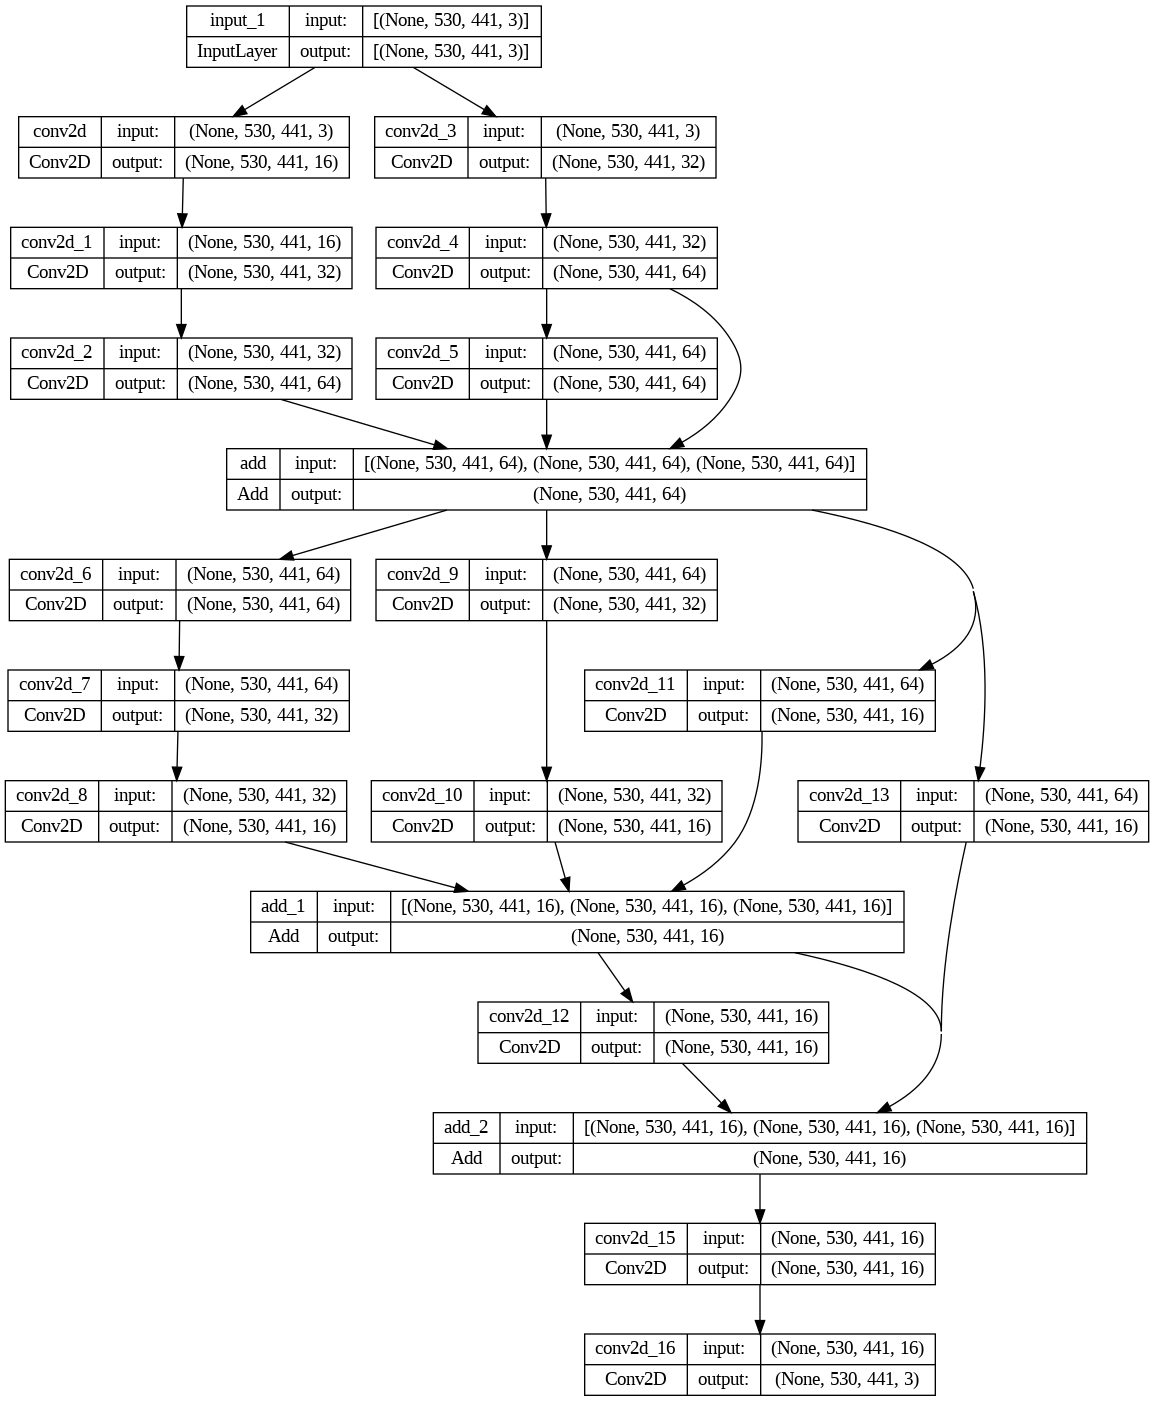

In [6]:
plot_model(Model_Enhancer,to_file='model_.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_.png')

In [ ]:
trainmodel = Model_Enhancer.fit(X_train, y_train, epochs=53, verbose=2, validation_data=(X_val, y_val))

Epoch 1/53
